In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset = pd.read_csv("SMSSpamCollection", sep='\t', names=['label', 'messages'])

In [3]:
dataset

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
 dataset.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
dataset['label'] = dataset['label'].map({'ham':0, 'spam': 1})

In [7]:
dataset

,label,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

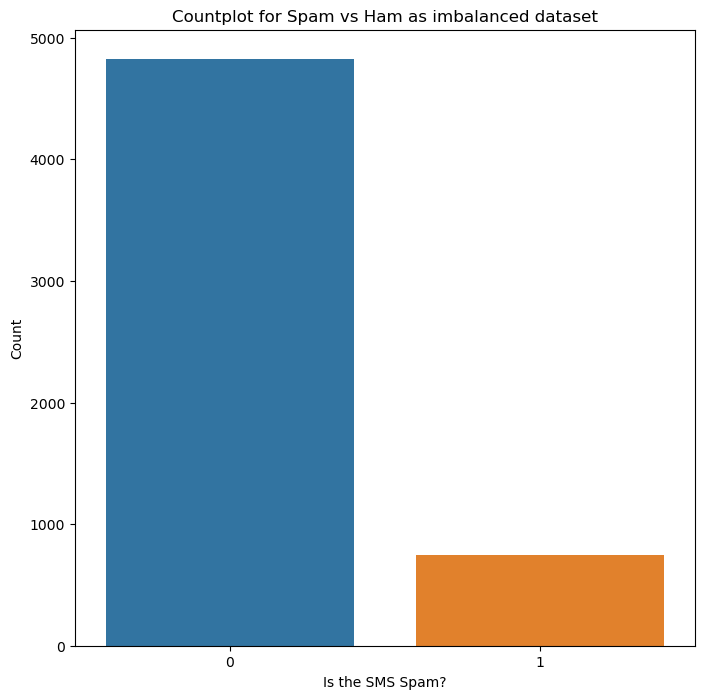

In [9]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [10]:
only_spam = dataset[dataset['label'] == 1]

In [11]:
only_spam

,label,messages
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [12]:
print('No. of Spam SMS:', len(only_spam))
print('No. of Ham SMS:', len(dataset) - len(only_spam))

No. of Spam SMS: 747
No. of Ham SMS: 4825


In [13]:
count = int((dataset.shape[0] - only_spam.shape[0])/ only_spam.shape[0])

In [14]:
count

6

In [15]:
for i in range (0,count-1):
    dataset = pd.concat([dataset, only_spam])

In [16]:
dataset.shape

(9307, 2)

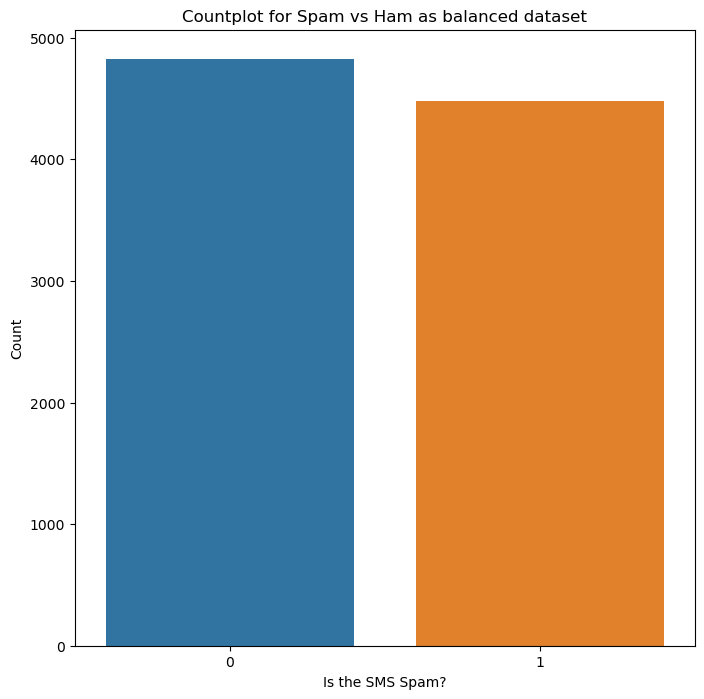

In [17]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='label', data=dataset)
p = plt.title('Countplot for Spam vs Ham as balanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('Count')

In [18]:
dataset['word_count'] = dataset['messages'].apply(lambda x: len(x.split()))

In [19]:
dataset

,label,messages,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


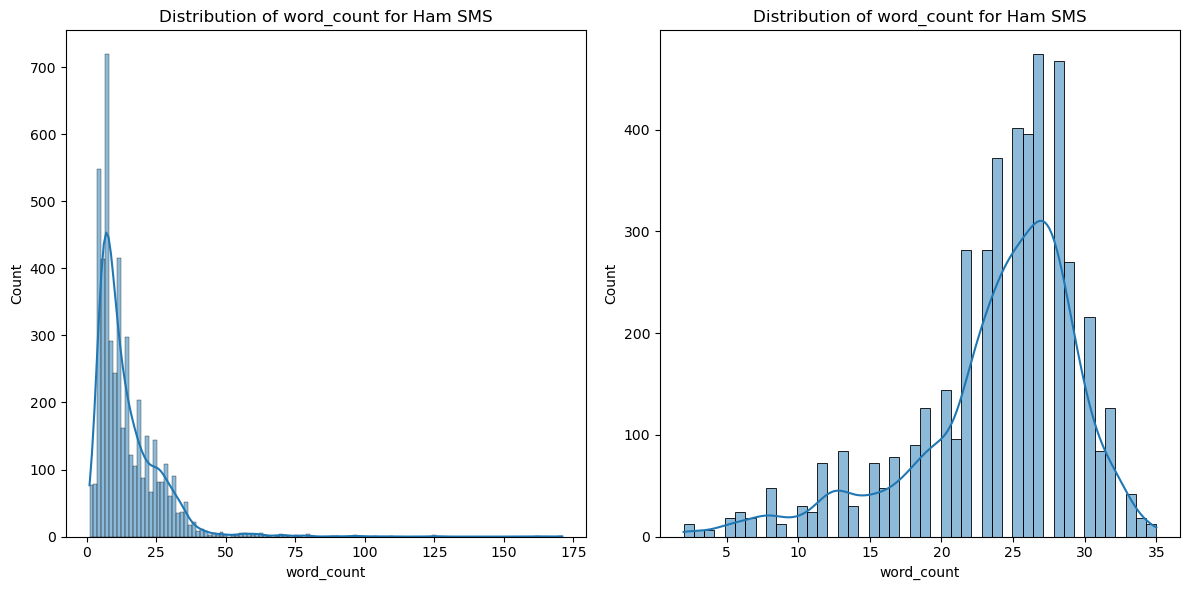

In [20]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde=True)
p = plt.title("Distribution of word_count for Ham SMS")

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, kde=True)
p = plt.title("Distribution of word_count for Ham SMS")

plt.tight_layout()
plt.show()

In [21]:
def currency(data):
    currency_symbols = ['$', '€', '₹']
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [22]:
dataset["contains_currency_symbols"] = dataset['messages'].apply(currency)

In [23]:
dataset

,label,messages,word_count,contains_currency_symbols
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


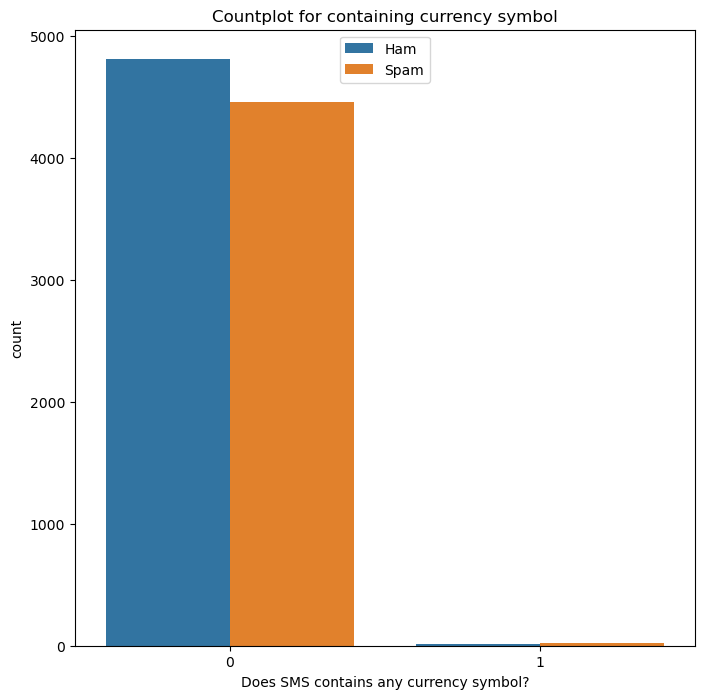

In [24]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_currency_symbols', data=dataset, hue = 'label')
p = plt.title('Countplot for containing currency symbol')
p = plt.xlabel("Does SMS contains any currency symbol?")
p = plt.ylabel('count')
p = plt.legend(labels=["Ham", "Spam"], loc= 9)

In [25]:
 def number(data):
        for i in data:
            if ord(i)>= 48 and ord(i) <= 57:
                return 1
        return 0

In [26]:
dataset["contains_number"] = dataset['messages'].apply(number)

In [27]:
dataset

,label,messages,word_count,contains_currency_symbols,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,0,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


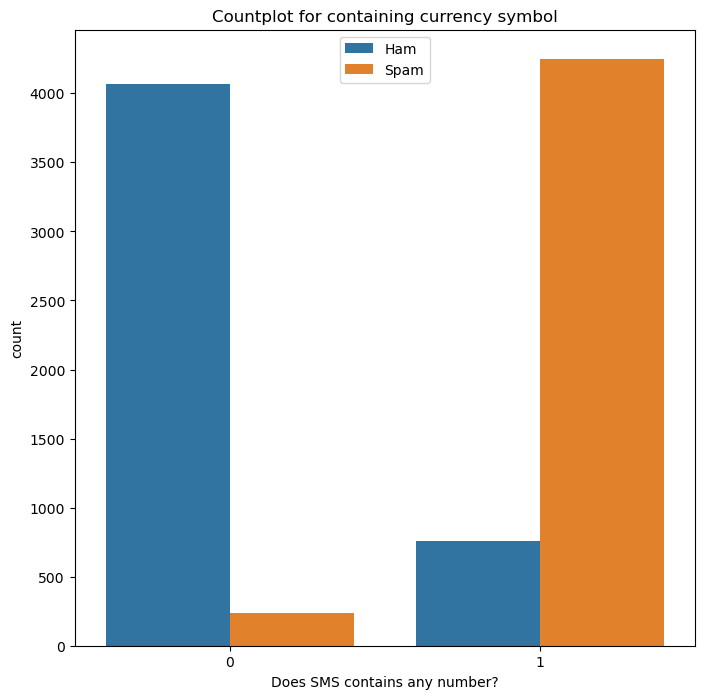

In [28]:
plt.figure(figsize=(8,8))
g = sns.countplot(x='contains_number', data=dataset, hue = 'label')
p = plt.title('Countplot for containing currency symbol')
p = plt.xlabel("Does SMS contains any number?")
p = plt.ylabel('count')
p = plt.legend(labels=["Ham", "Spam"], loc= 9)

In [29]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
import nltk
nltk.download('omw-1.4')

corpus = []
wnl = WordNetLemmatizer()

for sms in list(dataset.messages):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms) 
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in message if word not in set(stopwords.words('english'))] 
    lemm_words = [wnl.lemmatize(word) for word in message]
    message = ''.join(message)
    
    corpus.append(message)

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\prave\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [31]:
corpus

['go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   ',
 'ok lar    joking wif u oni   ',
 'free entry in   a wkly comp to win fa cup final tkts   st may       text fa to       to receive entry question std txt rate t c s apply            over   s',
 'u dun say so early hor    u c already then say   ',
 'nah i don t think he goes to usf  he lives around here though',
 'freemsg hey there darling it s been   week s now and no word back  i d like some fun you up for it still  tb ok  xxx std chgs to send        to rcv',
 'even my brother is not like to speak with me  they treat me like aids patent ',
 'as per your request  melle melle  oru minnaminunginte nurungu vettam   has been set as your callertune for all callers  press    to copy your friends callertune',
 'winner   as a valued network customer you have been selected to receivea      prize reward  to claim call              claim code kl     valid    hours only ',
 'had you

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()

In [33]:
X = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [34]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state= 42)

In [36]:
X_test

,about,ac,account,admirer,after,again,age,all,already,also,...,yeah,year,years,yes,yet,yo,you,your,yours,yr
1155,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.370403,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1790,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.437164,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3003,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
6489,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.106649,0.000000,0.0,0.0
592,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.130109,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8040,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.094791,0.000000,0.0,0.0
7213,0.255135,0.0,0.0,0.0,0.0,0.0,0.266597,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.139683,0.0,0.0
3538,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.123840,0.151205,0.0,0.0
8369,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [37]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.949
0.006


In [38]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [39]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.94      0.96      0.95      1596\n           1       0.96      0.94      0.95      1476\n\n    accuracy                           0.95      3072\n   macro avg       0.95      0.95      0.95      3072\nweighted avg       0.95      0.95      0.95      3072\n'

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1596
           1       0.96      0.94      0.95      1476

    accuracy                           0.95      3072
   macro avg       0.95      0.95      0.95      3072
weighted avg       0.95      0.95      0.95      3072



In [41]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1536,   60],
       [  91, 1385]], dtype=int64)

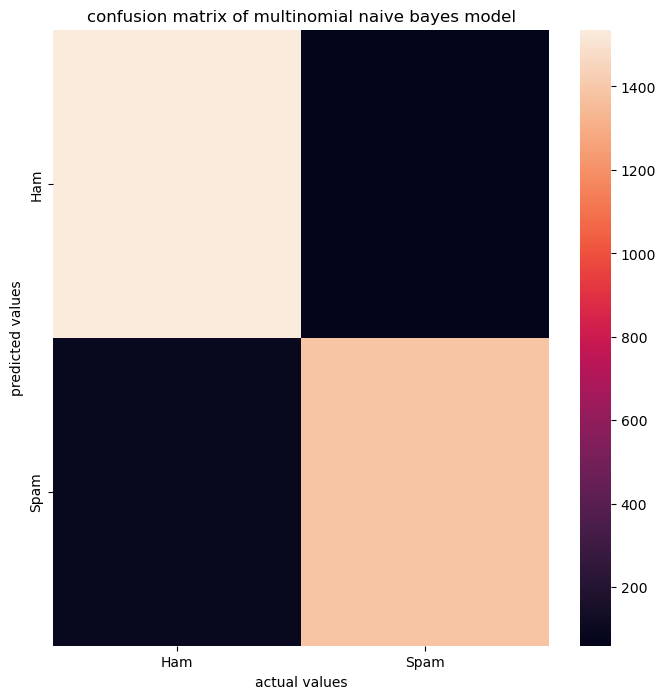

In [42]:
plt.figure(figsize=(8,8))
axis_labels = ['Ham', 'Spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels)
p = plt.title("confusion matrix of multinomial naive bayes model")
p = plt.xlabel('actual values')
p = plt.ylabel('predicted values')

In [43]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, X, y, scoring='f1', cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.984
0.002


In [44]:
dt.fit(X_train, y_train)
y_pred1 = dt.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1596
           1       0.96      0.94      0.95      1476

    accuracy                           0.95      3072
   macro avg       0.95      0.95      0.95      3072
weighted avg       0.95      0.95      0.95      3072



In [46]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1536,   60],
       [  91, 1385]], dtype=int64)

In [49]:
def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms) 
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in message if word not in set(stopwords.words('english'))] 
    lemm_words = [wnl.lemmatize(word) for word in message]
    message = ''.join(message)
    temp = tfidf.transform([message]).toarray()
    return mnb.predict(temp)

In [50]:
sample_message = 'You have won a lottery of 3000 $'

if predict_spam(sample_message):
    print("Gotcha! This is a Spam Message ")
    
else:
    print("The message is Ham")

Gotcha! This is a Spam Message 


C:\Users\prave\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(
